In [43]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [3]:
df=pd.read_csv('KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


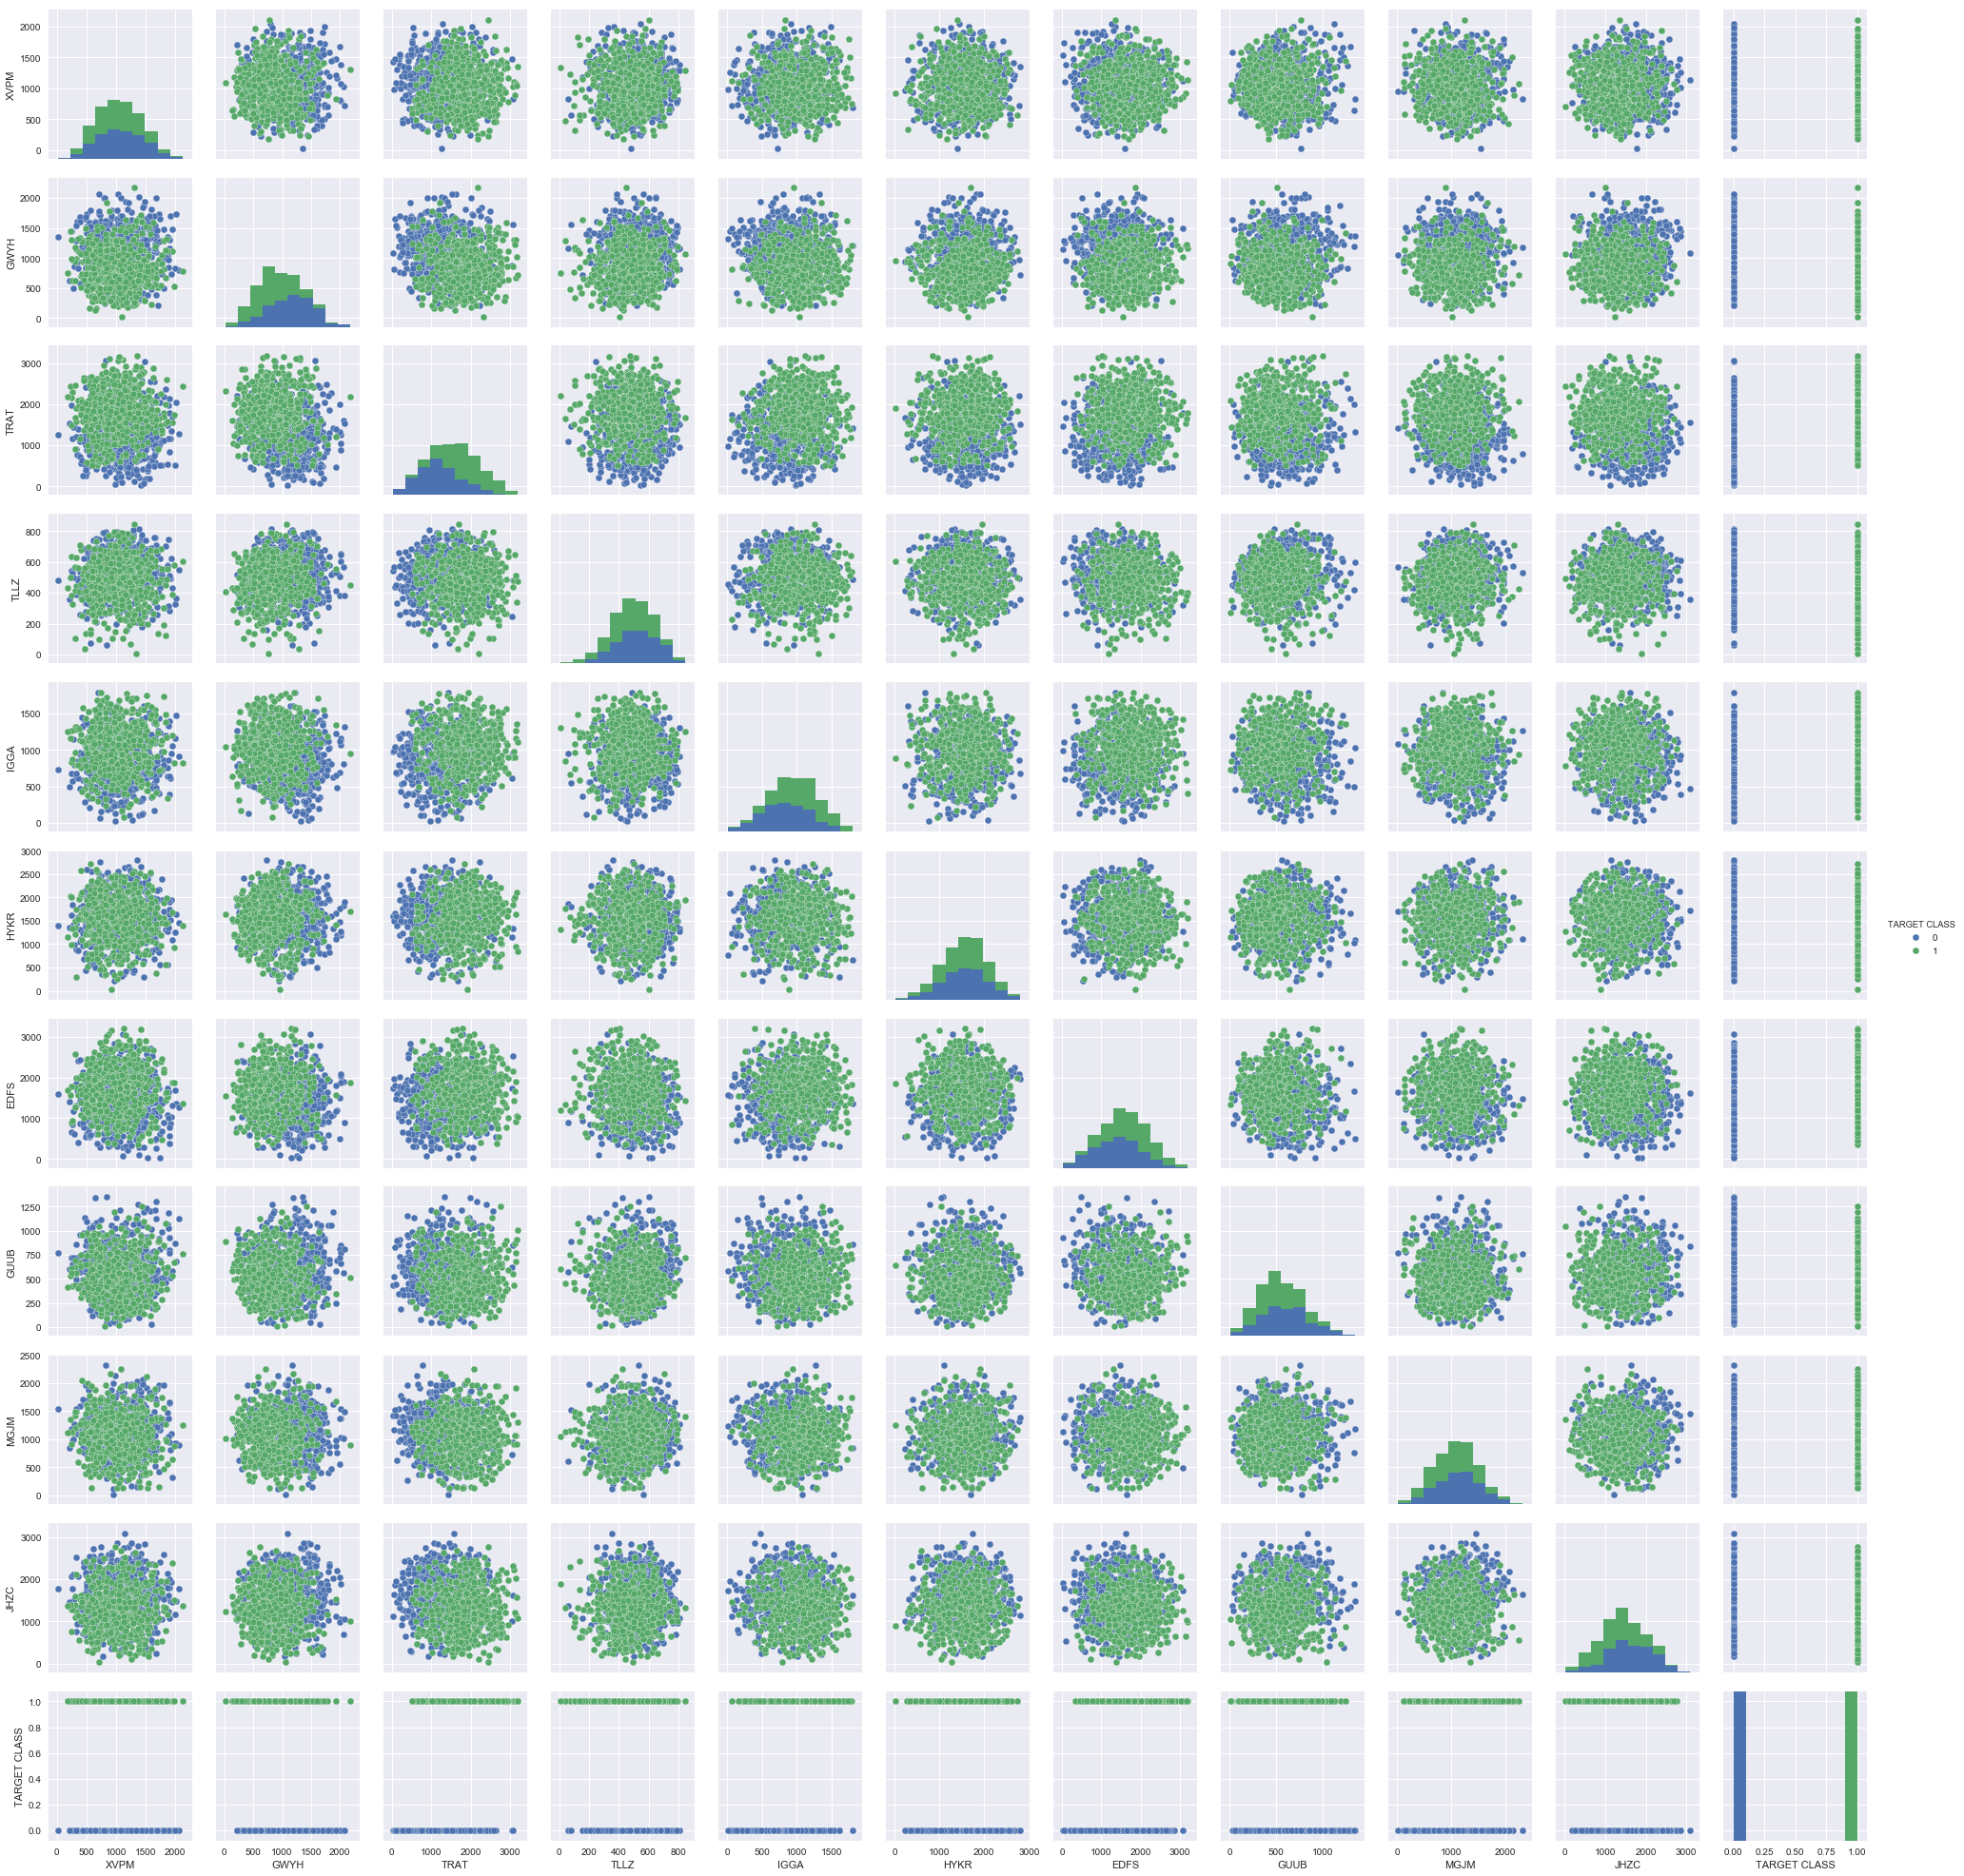

In [5]:
sb.pairplot(data=df,hue='TARGET CLASS')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaler_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [20]:
scaler_to_df=pd.DataFrame(scaler_feature, columns=df.columns[:-1])
scaler_to_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=scaler_to_df
y=df['TARGET CLASS']

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
predictions=knn.predict(X_test)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[109  43]
 [ 41 107]]
             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



In [44]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions=knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

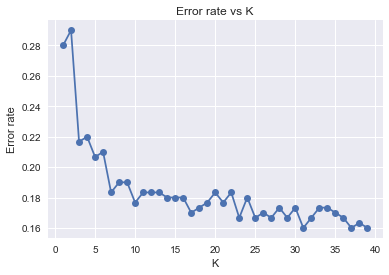

In [47]:
pl.plot(range(1,40),error_rate, marker='o')
pl.title('Error rate vs K')
pl.xlabel('K')
pl.ylabel('Error rate')

In [48]:
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions=knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))

[[109  43]
 [ 41 107]]
             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300

[[129  23]
 [ 64  84]]
             precision    recall  f1-score   support

          0       0.67      0.85      0.75       152
          1       0.79      0.57      0.66       148

avg / total       0.73      0.71      0.70       300

[[117  35]
 [ 30 118]]
             precision    recall  f1-score   support

          0       0.80      0.77      0.78       152
          1       0.77      0.80      0.78       148

avg / total       0.78      0.78      0.78       300

[[130  22]
 [ 44 104]]
             precision    recall  f1-score   support

          0       0.75      0.86      0.80       152
          1       0.83      0.70      0.76       148

avg / total       0.79      0.78      0.78       300

[[122  30]
 [ 32 116]]
             precision   